<a href="https://colab.research.google.com/github/Valentinhp/EXAMEN-LVHP/blob/main/TRABAJO_NETFLIX_LIZ_FINAL_FINAL_FINAL%20TERMINADO%2C%20FALTA%20INTERPRETAR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **VISUALIZACIÓN DE DATOS EMPRESARIALES**

### Profesor: LIZETH ITZIGUERY SOLANO ROMO  
### Estudiante: Leonardo Valentín Hernández Posada  
### Semestre: 7°  
### Carrera: Licenciatura en Informática y Tecnologías Computacionales  
### Universidad Autónoma de Aguascalientes  
### Departamento de Sistemas de Información  


In [43]:
!pip install pandas matplotlib seaborn plotly
!pip install --upgrade pandas seaborn

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import numpy as np
import plotly.express as px
import plotly.graph_objects as go

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

# 3.1. Introducción a Pandas
## 3.1.2. Carga de datos

In [45]:
df = pd.read_csv('https://raw.githubusercontent.com/Valentinhp/TRABAJOS-LIZ/main/NetFlix.csv',sep = ',')


In [4]:
df.dtypes

,0
show_id,object
type,object
title,object
director,object
cast,object
country,object
date_added,object
release_year,int64
rating,object
duration,int64


In [5]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,genres,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,14-Aug-20,2020,TV-MA,4,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s10,Movie,1920,Vikram Bhatt,"Rajneesh Duggal, Adah Sharma, Indraneil Sengup...",India,15-Dec-17,2008,TV-MA,143,"Horror Movies, International Movies, Thrillers",An architect and his wife move into a castle t...
2,s100,Movie,3 Heroines,Iman Brotoseno,"Reza Rahadian, Bunga Citra Lestari, Tara Basro...",Indonesia,5-Jan-19,2016,TV-PG,124,"Dramas, International Movies, Sports Movies",Three Indonesian women break records by becomi...
3,s1000,Movie,Blue Mountain State: The Rise of Thadland,Lev L. Spiro,"Alan Ritchson, Darin Brooks, James Cade, Rob R...",United States,1-Mar-16,2016,R,90,Comedies,New NFL star Thad buys his old teammates' belo...
4,s1001,TV Show,Blue Planet II,NaN,David Attenborough,United Kingdom,3-Dec-18,2017,TV-G,1,"British TV Shows, Docuseries, Science & Nature TV",This sequel to the award-winning nature series...




---


## CONVERSION DE VARIABLES

### funcion date_added

In [46]:
print(df['date_added'].head())

0    14-Aug-20
1    15-Dec-17
2     5-Jan-19
3     1-Mar-16
4     3-Dec-18
Name: date_added, dtype: object


In [47]:
# Intentamos convertir directamente, capturando errores
try:
    df['date_added'] = pd.to_datetime(df['date_added'])
except ValueError:
    # Si falla, intentamos con un formato específico
    df['date_added'] = pd.to_datetime(df['date_added'], format='%B %d, %Y', errors='coerce')

<ipython-input-47-6749a2b9179f>:3: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.



In [48]:
# Verificar el tipo de datos después de la conversión
print(df['date_added'].dtype)

datetime64[ns]


In [49]:
# Mostrar las primeras filas para verificar la conversión
print(df['date_added'].head())

# Si hay valores NaT (Not a Time) después de la conversión, los podemos identificar así:
print(df['date_added'].isna().sum())

0   2020-08-14
1   2017-12-15
2   2019-01-05
3   2016-03-01
4   2018-12-03
Name: date_added, dtype: datetime64[ns]
10


### rating

In [50]:
# Definir un diccionario de mapeo de ratings a valores numéricos
rating_map = {
    'G': 1,
    'PG': 2,
    'PG-13': 3,
    'R': 4,
    'NC-17': 5,
    'TV-Y': 1,
    'TV-Y7': 2,
    'TV-G': 1,
    'TV-PG': 2,
    'TV-14': 3,
    'TV-MA': 4
}

In [51]:
# Crear una nueva columna 'rating_numeric' con los valores convertidos
df['rating_numeric'] = df['rating'].map(rating_map)


In [52]:
# Para manejar cualquier rating que no esté en el diccionario, puedes usar un valor predeterminado

df['rating_numeric'] = df['rating'].map(rating_map).fillna(0)

# Mostrar las primeras filas para verificar la conversión
print(df[['rating', 'rating_numeric']].head())

# Obtener estadísticas básicas de la nueva columna numérica
print(df['rating_numeric'].describe())

  rating  rating_numeric
0  TV-MA             4.0
1  TV-MA             4.0
2  TV-PG             2.0
3      R             4.0
4   TV-G             1.0
count    7787.000000
mean        3.112752
std         0.996720
min         0.000000
25%         3.000000
50%         3.000000
75%         4.000000
max         5.000000
Name: rating_numeric, dtype: float64


In [13]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,genres,description,rating_numeric
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,4.0
1,s10,Movie,1920,Vikram Bhatt,"Rajneesh Duggal, Adah Sharma, Indraneil Sengup...",India,2017-12-15,2008,TV-MA,143,"Horror Movies, International Movies, Thrillers",An architect and his wife move into a castle t...,4.0
2,s100,Movie,3 Heroines,Iman Brotoseno,"Reza Rahadian, Bunga Citra Lestari, Tara Basro...",Indonesia,2019-01-05,2016,TV-PG,124,"Dramas, International Movies, Sports Movies",Three Indonesian women break records by becomi...,2.0
3,s1000,Movie,Blue Mountain State: The Rise of Thadland,Lev L. Spiro,"Alan Ritchson, Darin Brooks, James Cade, Rob R...",United States,2016-03-01,2016,R,90,Comedies,New NFL star Thad buys his old teammates' belo...,4.0
4,s1001,TV Show,Blue Planet II,NaN,David Attenborough,United Kingdom,2018-12-03,2017,TV-G,1,"British TV Shows, Docuseries, Science & Nature TV",This sequel to the award-winning nature series...,1.0


In [14]:
df.dtypes

,0
show_id,object
type,object
title,object
director,object
cast,object
country,object
date_added,datetime64[ns]
release_year,int64
rating,object
duration,int64




---
# ESTADISTICA


## DESCRIPTIVA

In [15]:
# para variables numéricas
numeric_columns = ['release_year', 'duration', 'rating_numeric']
print("Estadísticas descriptivas para variables numéricas:")
print(df[numeric_columns].describe())

Estadísticas descriptivas para variables numéricas:
       release_year     duration  rating_numeric
count   7787.000000  7787.000000     7787.000000
mean    2013.932580    69.122769        3.112752
std        8.757395    50.950743        0.996720
min     1925.000000     1.000000        0.000000
25%     2013.000000     2.000000        3.000000
50%     2017.000000    88.000000        3.000000
75%     2018.000000   106.000000        4.000000
max     2021.000000   312.000000        5.000000


### Año de lanzamiento (release_year):
- **Cantidad (n = 7787)**: Hay 7787 registros con el año de lanzamiento  
- **Promedio (Media = 2013.93)**: El año promedio de lanzamiento es 2013, la mayoría del contenido es reciente  
- **Desviación estándar (8.76)**: Hay variedad en los años de lanzamiento, desde contenido muy nuevo hasta algo más antiguo  
- **Mínimo (1925)**: El contenido más antiguo es de 1925  
- **Percentiles**:  
  - **25% (Q1 = 2013)**: Un cuarto del contenido se lanzó en 2013 o antes  
  - **50% (Mediana = 2017)**: La mitad del contenido fue lanzado después de 2017  
  - **75% (Q3 = 2018)**: El 75% del contenido es de antes de 2018  
  - **Máximo (2021)**: El más reciente es de 2021  

**Interpretación**: La mayoría del contenido es reciente, entre 2013 y 2018, aunque hay algunos más viejos  

### Duración (duration):
- **Cantidad (n = 7787)**: Todos los contenidos tienen una duración registrada  
- **Promedio (Media = 69.12 minutos)**: El contenido dura en promedio 69 minutos, pero las duraciones varían mucho  
- **Desviación estándar (50.95 minutos)**: Hay gran diferencia entre las duraciones, algunas son muy cortas y otras larguísimas  
- **Mínimo (1 minuto)**: El contenido más corto dura solo 1 minuto  
- **Percentiles**:  
  - **25% (Q1 = 2 minutos)**: Un cuarto del contenido dura 2 minutos o menos  
  - **50% (Mediana = 88 minutos)**: La mitad de los contenidos dura 88 minutos o menos  
  - **75% (Q3 = 106 minutos)**: El 75% dura menos de 106 minutos  
  - **Máximo (312 minutos)**: El más largo dura 312 minutos  

**Interpretación**: Hay mucha variedad, desde videos cortísimos hasta contenido de más de 5 horas, aunque la mayoría son películas con duraciones más normales  

### Calificación numérica (rating_numeric):
- **Cantidad (n = 7787)**: Todas las calificaciones están registradas  
- **Promedio (Media = 3.11)**: En promedio, las calificaciones son de 3.11, lo que indica valoraciones aceptables, pero no muy altas  
- **Desviación estándar (0.99)**: Las calificaciones no varían mucho, la mayoría está alrededor de 3  
- **Mínimo (0)**: La calificación más baja es 0  
- **Percentiles**:  
  - **25% (Q1 = 3)**: Un cuarto del contenido tiene una calificación de 3 o menos  
  - **50% (Mediana = 3)**: La mitad del contenido tiene una calificación de 3  
  - **75% (Q3 = 4)**: El 75% tiene una calificación de 4 o menos  
  - **Máximo (5)**: Algunos contenidos tienen la calificación máxima de 5  

**Interpretación**: Las calificaciones se concentran entre 3 y 4, lo que indica que el contenido en general está bien valorado, pero no alcanza notas muy altas


## MEDIDAS DE TENDENCIA CENTRAL

In [16]:
print("\nMedidas de tendencia central para variables numéricas:")
for column in numeric_columns:
    print(f"\n{column}:")
    print(f"Media: {df[column].mean():.2f}")
    print(f"Mediana: {df[column].median():.2f}")
    print(f"Moda: {df[column].mode().values[0]:.2f}")


Medidas de tendencia central para variables numéricas:

release_year:
Media: 2013.93
Mediana: 2017.00
Moda: 2018.00

duration:
Media: 69.12
Mediana: 88.00
Moda: 1.00

rating_numeric:
Media: 3.11
Mediana: 3.00
Moda: 4.00


### release_year (Año de lanzamiento)

**Media = 2013.93**: El promedio de lanzamiento es más o menos en 2014, lo que significa que la mayoría del contenido es reciente  
**Mediana = 2017.00**: La mitad del contenido se lanzó después de 2017, o sea que lo más común es que sea contenido nuevo  
**Moda = 2018.00**: El año que más se repite es 2018, o sea que muchos lanzamientos ocurrieron en ese año  

**Interpretación**: Aunque el promedio es de 2013, los datos muestran que el contenido reciente, sobre todo el de 2018, es lo que más abunda. Esto quiere decir que, aunque hay cosas viejas, la mayoría es más nueva  

### duration (Duración en minutos)

**Media = 69.12 minutos**: En promedio, los contenidos duran 69 minutos, pero este promedio puede estar afectado por cosas muy cortas o muy largas  
**Mediana = 88.00 minutos**: La mitad del contenido dura 88 minutos o menos, lo que es común para una película  
**Moda = 1.00 minuto**: La duración más común es de 1 minuto, lo que sugiere que hay muchos videos cortos  

**Interpretación**: Aunque el promedio es de 69 minutos, la mediana de 88 minutos refleja mejor la duración típica de una película. La moda de 1 minuto muestra que hay muchos videos cortitos  

### rating_numeric (Calificación numérica)

**Media = 3.11**: El promedio de calificación es de 3.11, lo que significa que la mayoría de los contenidos tiene buenas calificaciones, pero no súper altas  
**Mediana = 3.00**: La mitad de los contenidos tiene una calificación de 3 o menos, lo que indica que muchas cosas están valoradas de manera regular  
**Moda = 4.00**: La calificación más repetida es 4, lo que sugiere que hay bastante contenido bien valorado  

**Interpretación**: La mayoría de las calificaciones están entre 3 y 4, lo que muestra que el contenido tiene valoraciones decentes, con bastantes contenidos que son bien valorados


In [17]:
categorical_columns = ['type', 'rating', 'genres']
print("\nEstadísticas para variables categóricas:")
for column in categorical_columns:
    print(f"\n{column}:")
    print(df[column].value_counts())
    print(f"Moda: {df[column].mode().values[0]}")


Estadísticas para variables categóricas:

type:
type
Movie      5377
TV Show    2410
Name: count, dtype: int64
Moda: Movie

rating:
rating
TV-MA       2863
TV-14       1931
TV-PG        806
R            665
PG-13        386
TV-Y         280
TV-Y7        271
PG           247
TV-G         194
NR            84
G             39
TV-Y7-FV       6
UR             5
NC-17          3
Name: count, dtype: int64
Moda: TV-MA

genres:
genres
Documentaries                                                      334
Stand-Up Comedy                                                    321
Dramas, International Movies                                       320
Comedies, Dramas, International Movies                             243
Dramas, Independent Movies, International Movies                   215
                                                                  ... 
British TV Shows, Docuseries, TV Comedies                            1
Horror Movies, International Movies, Sci-Fi & Fantasy                1


### 1. Tipo de contenido
- **Frecuencias**:  
  - *Películas*: 5377 contenidos  
  - *Programas de TV*: 2410 contenidos  

- **Moda**:  
  - *Películas* es la categoría más común

- **Interpretación**:  
  La mayoría del contenido son películas, lo que indica que hay una oferta más amplia de este formato en la plataforma comparado con programas de televisión.


### 2. Clasificación por edad
- **Frecuencias**:  
  - *TV-MA* (audiencia madura): 2863 contenidos  
  - *TV-14* (mayores de 14): 1931 contenidos  
  - *TV-PG* (supervisión parental): 806 contenidos  
  - *R*: 665 contenidos  
  - *PG-13*: 386 contenidos  
  - *TV-Y* (para niños pequeños): 280 contenidos  

- **Moda**:  
  - *TV-MA* es la categoría más frecuente

- **Interpretación**:  
  La mayor parte del contenido es para adultos, aunque también hay bastante dirigido a adolescentes y familias, y menos contenido pensado para niños.



### 3. Géneros
- **Frecuencias**:  
  - *Documentales*: 334 contenidos  
  - *Stand-Up Comedy*: 321 contenidos  
  - *Dramas y Películas Internacionales*: 320 contenidos  
  - *Comedias, Dramas y Películas Internacionales*: 243 contenidos  
  - *Dramas, Películas Independientes e Internacionales*: 215 contenidos  

- **Moda**:  
  - *Documentales* es el género más frecuente

- **Interpretación**:  
  Los documentales son el género con más contenido, seguido de comedia en vivo y dramas internacionales, lo que muestra una buena variedad en la plataforma.


In [18]:
# Estadísticas para la columna de fecha
print("\nEstadísticas para la columna de fecha:")
print(f"Fecha más temprana: {df['date_added'].min()}")
print(f"Fecha más reciente: {df['date_added'].max()}")
print(f"Rango de fechas: {df['date_added'].max() - df['date_added'].min()}")


Estadísticas para la columna de fecha:
Fecha más temprana: 2008-01-01 00:00:00
Fecha más reciente: 2021-01-16 00:00:00
Rango de fechas: 4764 days 00:00:00


**Fecha más temprana:**  
2008-01-01  
La primera fecha registrada es del 1 de enero de 2008, lo que significa que el contenido más antiguo en este conjunto de datos se agregó en ese momento, esto puede indicar que es el inicio o una fase temprana de la plataforma



**Fecha más reciente:**  
2021-01-16  
La fecha más reciente es el 16 de enero de 2021, lo que nos dice que hasta esa fecha se añadió contenido al dataset, entonces si lo analizas después de esta fecha, sería bueno revisar si ha seguido siendo actualizado



**Rango de fechas:**  
4764 días (aproximadamente 13 años)  
El rango de tiempo abarca unos 13 años (4764 días), lo que muestra que el contenido ha sido agregado de manera constante desde 2008 hasta 2021, lo cual indica que ha habido un crecimiento y estabilidad en la plataforma


In [19]:
# Conteo de valores únicos para otras columnas de objeto
object_columns = ['show_id', 'title', 'director', 'cast', 'country', 'description']
print("\nConteo de valores únicos para otras columnas de objeto:")
for column in object_columns:
    print(f"{column}: {df[column].nunique()} valores únicos")


Conteo de valores únicos para otras columnas de objeto:
show_id: 7787 valores únicos
title: 7787 valores únicos
director: 4049 valores únicos
cast: 6831 valores únicos
country: 681 valores únicos
description: 7769 valores únicos


show_id y title: Cada contenido tiene un identificador y título únicos, lo que asegura que no hay duplicados en el catálogo
director: Menos de la mitad de los contenidos tiene un director exclusivo, lo que muestra que muchos directores participan en varios títulos
cast: Los elencos son muy diversos, con pocas repeticiones, lo que refleja la gran variedad de actores en los contenidos
country: Los contenidos vienen de 681 combinaciones de países, lo que resalta la diversidad geográfica del catálogo
description: Casi todas las descripciones son diferentes, lo que sugiere que la mayoría de los títulos tiene una sinopsis única

In [20]:
# Conteo de valores únicos para otras columnas de objeto
object_columns = ['show_id', 'title', 'director', 'cast', 'country', 'description']
print("\nConteo de valores únicos para otras columnas de objeto:")
for column in object_columns:
    print(f"{column}: {df[column].nunique()} valores únicos")


Conteo de valores únicos para otras columnas de objeto:
show_id: 7787 valores únicos
title: 7787 valores únicos
director: 4049 valores únicos
cast: 6831 valores únicos
country: 681 valores únicos
description: 7769 valores únicos




show_id y title: Cada contenido tiene un ID y título únicos, no hay duplicados
director: Hay varios directores, pero algunos han trabajado en varios títulos
cast: Los elencos son diversos, lo que muestra una rica variedad de actores
country: El contenido es de diferentes países, resaltando su naturaleza internacional
description: Casi todas las descripciones son únicas, lo que facilita diferenciar los títulos

In [21]:
df.describe()

,date_added,release_year,duration,rating_numeric
count,7777,7787.000000,7787.000000,7787.000000
mean,2019-01-02 19:20:57.708627712,2013.932580,69.122769,3.112752
min,2008-01-01 00:00:00,1925.000000,1.000000,0.000000
25%,2018-02-01 00:00:00,2013.000000,2.000000,3.000000
50%,2019-03-08 00:00:00,2017.000000,88.000000,3.000000
75%,2020-01-20 00:00:00,2018.000000,106.000000,4.000000
max,2021-01-16 00:00:00,2021.000000,312.000000,5.000000
std,NaN,8.757395,50.950743,0.996720


In [22]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,genres,description,rating_numeric
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,4.0
1,s10,Movie,1920,Vikram Bhatt,"Rajneesh Duggal, Adah Sharma, Indraneil Sengup...",India,2017-12-15,2008,TV-MA,143,"Horror Movies, International Movies, Thrillers",An architect and his wife move into a castle t...,4.0
2,s100,Movie,3 Heroines,Iman Brotoseno,"Reza Rahadian, Bunga Citra Lestari, Tara Basro...",Indonesia,2019-01-05,2016,TV-PG,124,"Dramas, International Movies, Sports Movies",Three Indonesian women break records by becomi...,2.0
3,s1000,Movie,Blue Mountain State: The Rise of Thadland,Lev L. Spiro,"Alan Ritchson, Darin Brooks, James Cade, Rob R...",United States,2016-03-01,2016,R,90,Comedies,New NFL star Thad buys his old teammates' belo...,4.0
4,s1001,TV Show,Blue Planet II,NaN,David Attenborough,United Kingdom,2018-12-03,2017,TV-G,1,"British TV Shows, Docuseries, Science & Nature TV",This sequel to the award-winning nature series...,1.0


In [23]:
### Manejo de datos faltantes y duplicados ---- cuidado con este
df.dropna(subset=['director'], inplace=True)
df.drop_duplicates(inplace=True)



---

# GRAFICOS

## BASICOS

### 1. Histograma de release_year


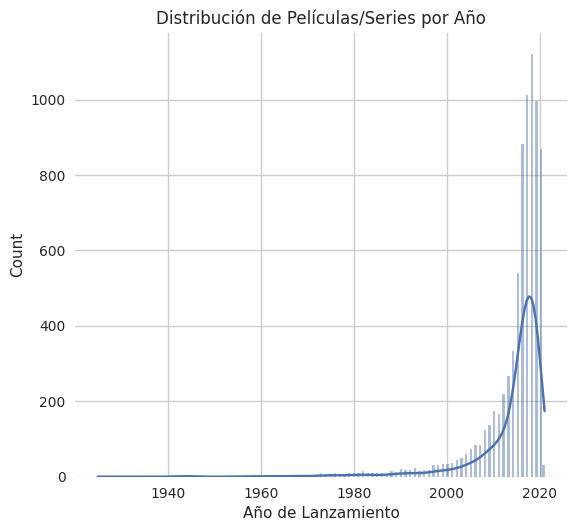

In [53]:
plt.figure(figsize=(16, 10))
sns.set_style("whitegrid")

plt.subplot(2, 3, 1)
sns.histplot(df['release_year'], kde=True)
plt.title('Distribución de Películas/Series por Año')
plt.xlabel('Año de Lanzamiento')

plt.tight_layout()
plt.show()

El gráfico muestra que hasta 1980 casi no había lanzamientos, pero a partir de los 90 empieza a crecer y después del 2000 se dispara, llegando a su punto más alto en 2018, después de eso baja en 2020, probablemente por la pandemia, la mayoría del contenido es de los últimos años

### 2. Histograma de duration

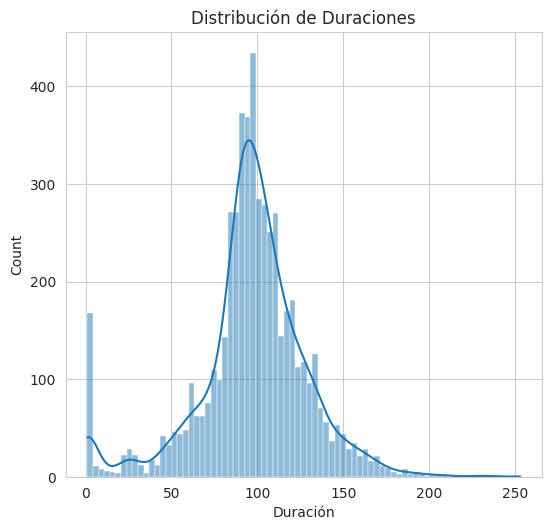

In [25]:
plt.figure(figsize=(16, 10))
sns.set_style("whitegrid")
plt.subplot(2, 3, 2)
sns.histplot(df['duration'], kde=True)
plt.title('Distribución de Duraciones')
plt.xlabel('Duración')


plt.tight_layout()

plt.show()

El gráfico muestra que hay muchos contenidos muy cortos, casi de 0 minutos, luego se nota un aumento en duraciones típicas de películas, siendo común entre 90 y 100 minutos, después de 120 minutos, la cantidad baja mucho, la mayoría de los contenidos duran cerca de 100 minutos y los más largos son pocos

### 3. Gráfico de barras de rating

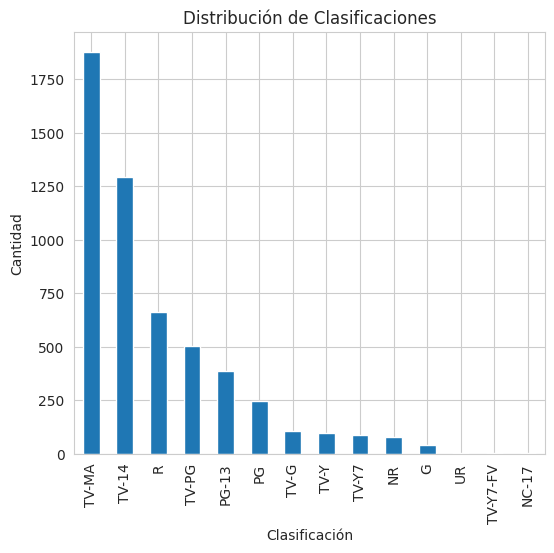

In [26]:
plt.figure(figsize=(16, 10))
sns.set_style("whitegrid")
plt.subplot(2, 3, 3)
df['rating'].value_counts().plot(kind='bar')
plt.title('Distribución de Clasificaciones')
plt.xlabel('Clasificación')
plt.ylabel('Cantidad')


plt.tight_layout()
plt.show()

El gráfico muestra que la mayoría del contenido es para adultos con casi 3000 títulos TV-MA, después vienen TV-14 y TV-PG con menos contenido, y lo dirigido a niños es mucho menor, lo que indica que hay más contenido para adultos y menos para jóvenes o para todos

### 4. Gráfico de pastel de type

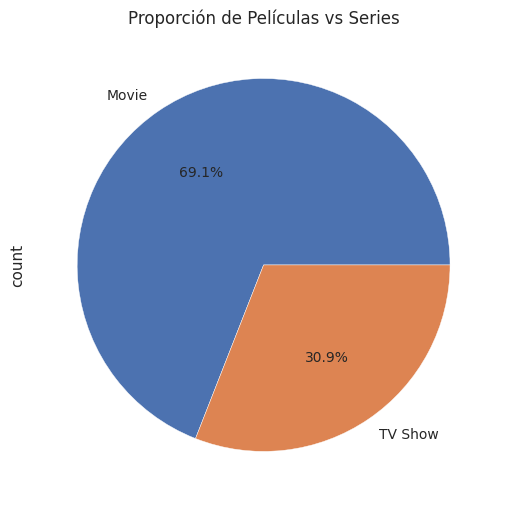

In [60]:
plt.figure(figsize=(16, 10))
sns.set_style("whitegrid")
plt.subplot(2, 3, 4)
df['type'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Proporción de Películas vs Series')


plt.tight_layout()
plt.show()

El gráfico muestra que el 69.1% es de películas y el 30.9% de series, o sea, hay más películas que series en el catálogo, lo que deja claro que está más enfocado en películas, aunque también hay una buena cantidad de series

### 5. Gráfico de barras de country (top 10)

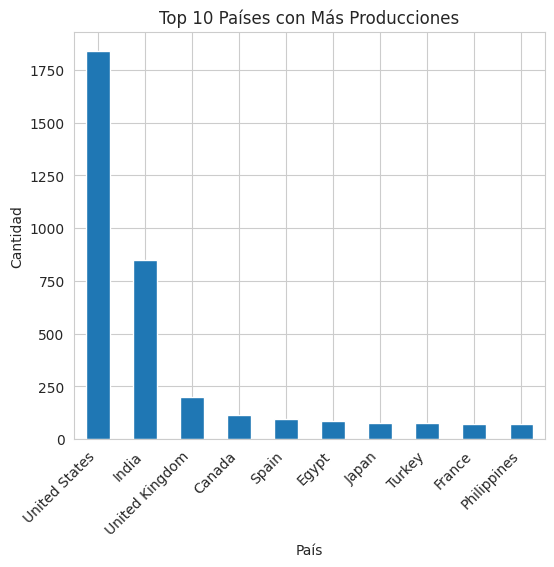

In [28]:
plt.figure(figsize=(16, 10))
sns.set_style("whitegrid")
plt.subplot(2, 3, 5)
df['country'].value_counts().head(10).plot(kind='bar')
plt.title('Top 10 Países con Más Producciones')
plt.xlabel('País')
plt.ylabel('Cantidad')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

El gráfico muestra que Estados Unidos manda con más de 2500 producciones, luego viene India con unas 1000, otros como Reino Unido, Japón y Corea del Sur también tienen lo suyo pero mucho menos, Canadá, España, Francia, Egipto y México cierran el top 10 con menos, esto deja claro que la industria de Estados Unidos domina, seguida de otros centros importantes como India y Reino Unido

### 6. Gráfico de barras de generos (top 10)

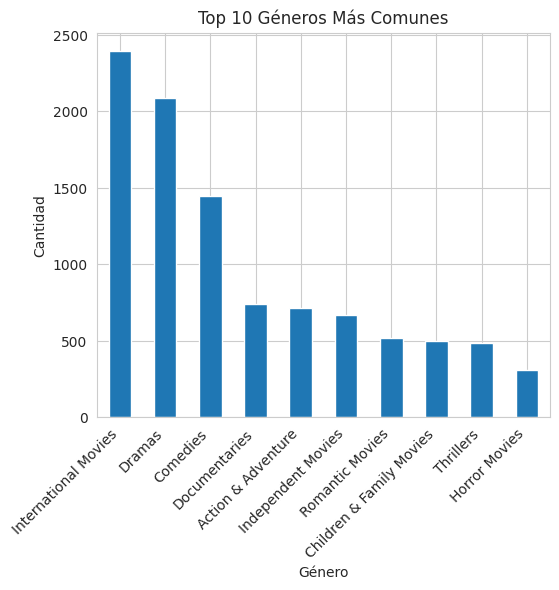

In [29]:
plt.figure(figsize=(16, 10))
sns.set_style("whitegrid")
plt.subplot(2, 3, 6)
df['genres'].str.split(', ', expand=True).stack().value_counts().head(10).plot(kind='bar')
plt.title('Top 10 Géneros Más Comunes')
plt.xlabel('Género')
plt.ylabel('Cantidad')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()


El gráfico muestra que los International Movies son los más comunes con unos 2500 títulos, luego vienen los Dramas con más de 2000, después Comedias y International TV Shows con buen contenido, géneros como Documentaries, Action & Adventure y TV Dramas también tienen lo suyo, pero menos, los menos comunes son Independent Movies, Children & Family Movies y Romantic Movies, lo que deja claro que hay una preferencia por contenido internacional y dramas

## AVANZADOS

In [30]:
# Configuración general de estilo
plt.style.use('seaborn')
sns.set_palette("deep")


<ipython-input-30-ae00953e294e>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


### 1. Scatter plot de release_year vs duration

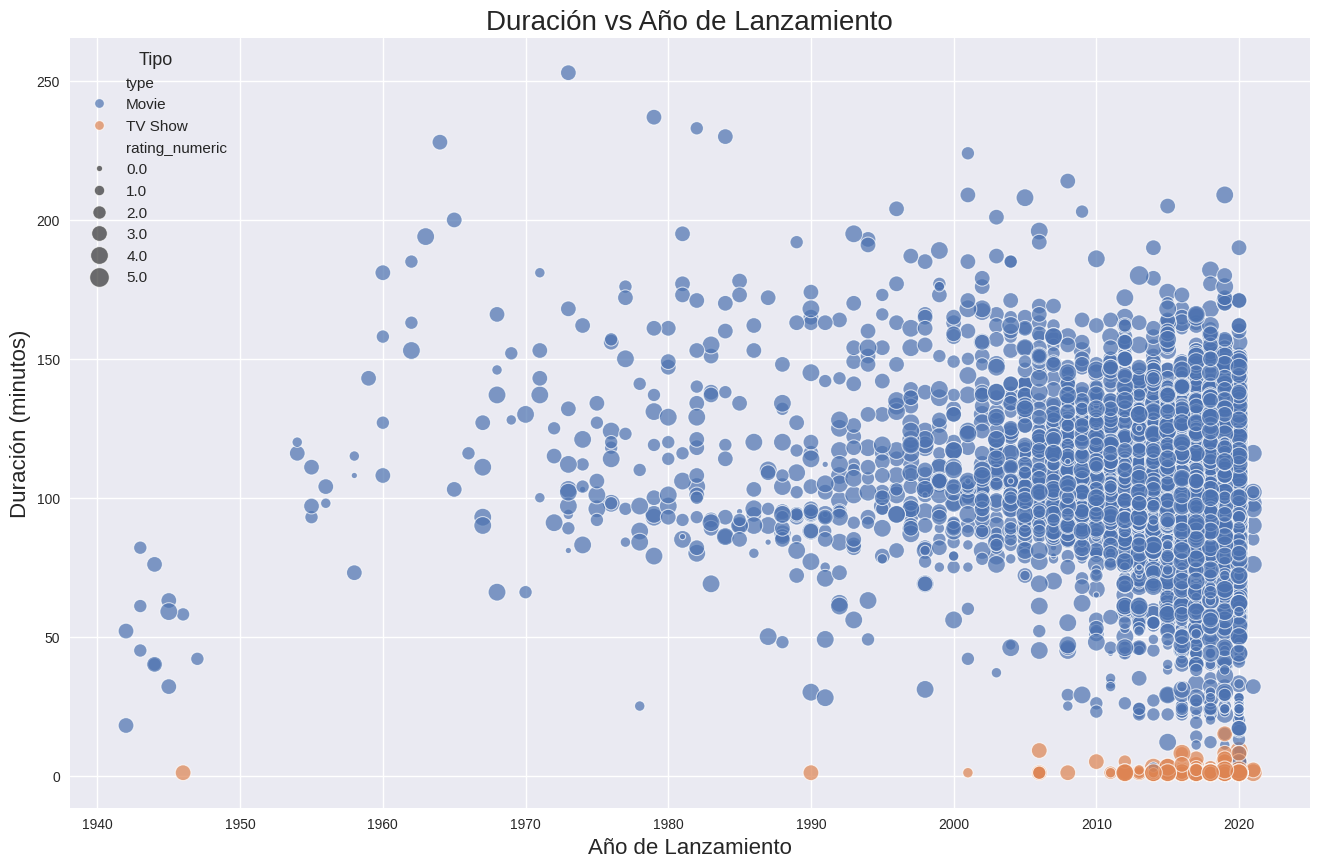

In [31]:
plt.figure(figsize=(16, 10))
sns.scatterplot(data=df, x='release_year', y='duration', hue='type', size='rating_numeric', sizes=(20, 200), alpha=0.7)
plt.title('Duración vs Año de Lanzamiento', fontsize=20)
plt.xlabel('Año de Lanzamiento', fontsize=16)
plt.ylabel('Duración (minutos)', fontsize=16)
plt.legend(title='Tipo', title_fontsize='13', fontsize='11')
plt.show()

El gráfico muestra que las peliculas, que están en azul, suelen durar más y ser más variadas, mientras que los programas de TV, que aparecen en naranja, son más cortos y empezaron a aumentar mucho desde el 2000 por el streaming, las peliculas más largas, sobre todo las de más de 150 minutos, suelen tener mejores calificaciones, aunque también hay series recientes muy bien valoradas, en general, ha crecido un montón la cantidad de pelis y programas, pero cada uno tiene duraciones y calidades diferentes

### 2. Box plot de duración por tipo

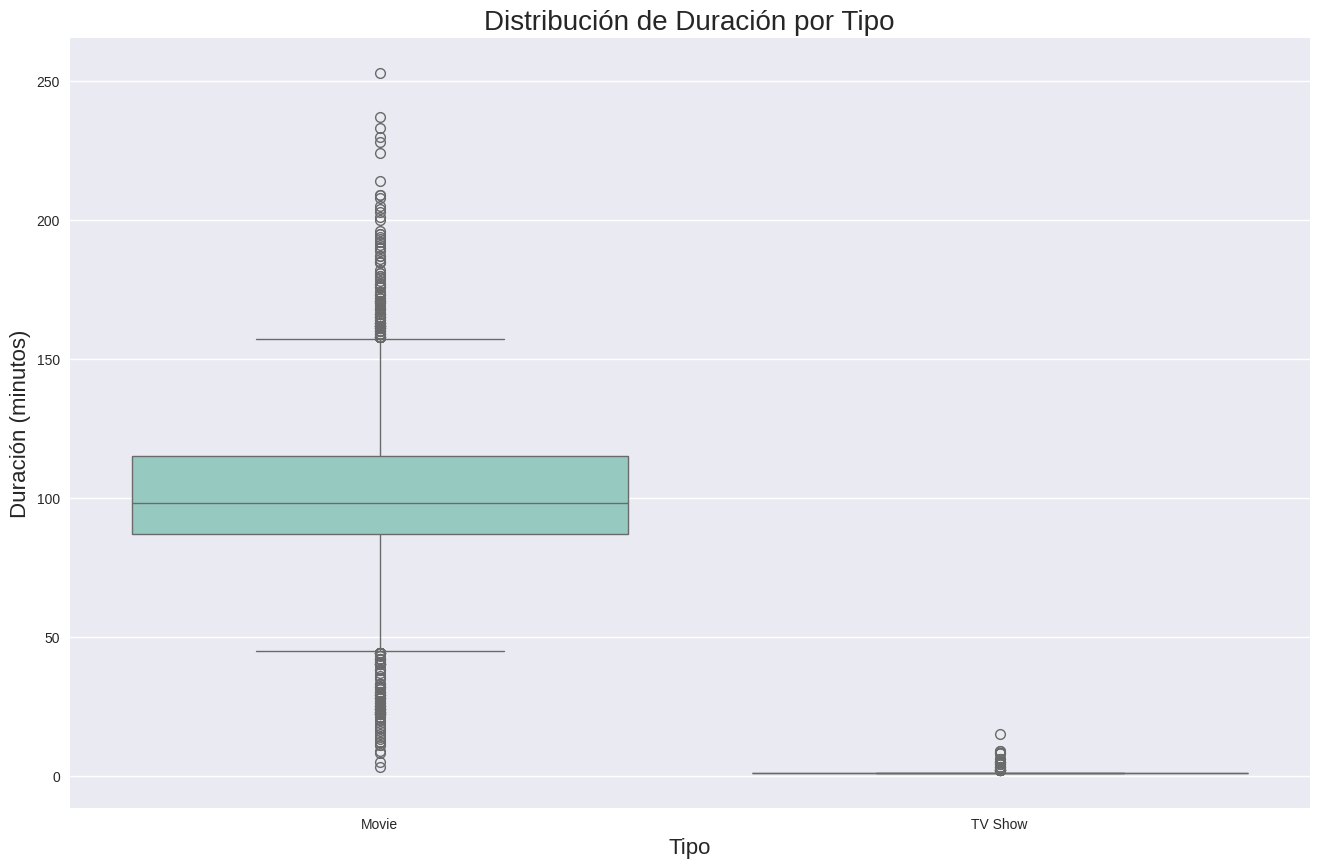

In [32]:
plt.figure(figsize=(16, 10))
sns.boxplot(data=df, x='type', y='duration', hue='type', dodge=False, palette='Set3')
plt.title('Distribución de Duración por Tipo', fontsize=20)
plt.xlabel('Tipo', fontsize=16)
plt.ylabel('Duración (minutos)', fontsize=16)
plt.show()

El gráfico muestra que las peliculas casi siempre duran entre 90 y 130 minutos, aunque algunas llegan hasta 250 minutos, pero esas son mas raras, también hay peliculas mas cortas, de menos de 50 minutos, por otro lado, los programas de TV casi todos duran entre 30 y 40 minutos, y aunque hay unos pocos que duran menos de 50, la mayoría son bastante parejos, en general, las peliculas duran más y varían mucho, mientras que los programas de TV son más cortos y tienen duraciones más parecidas

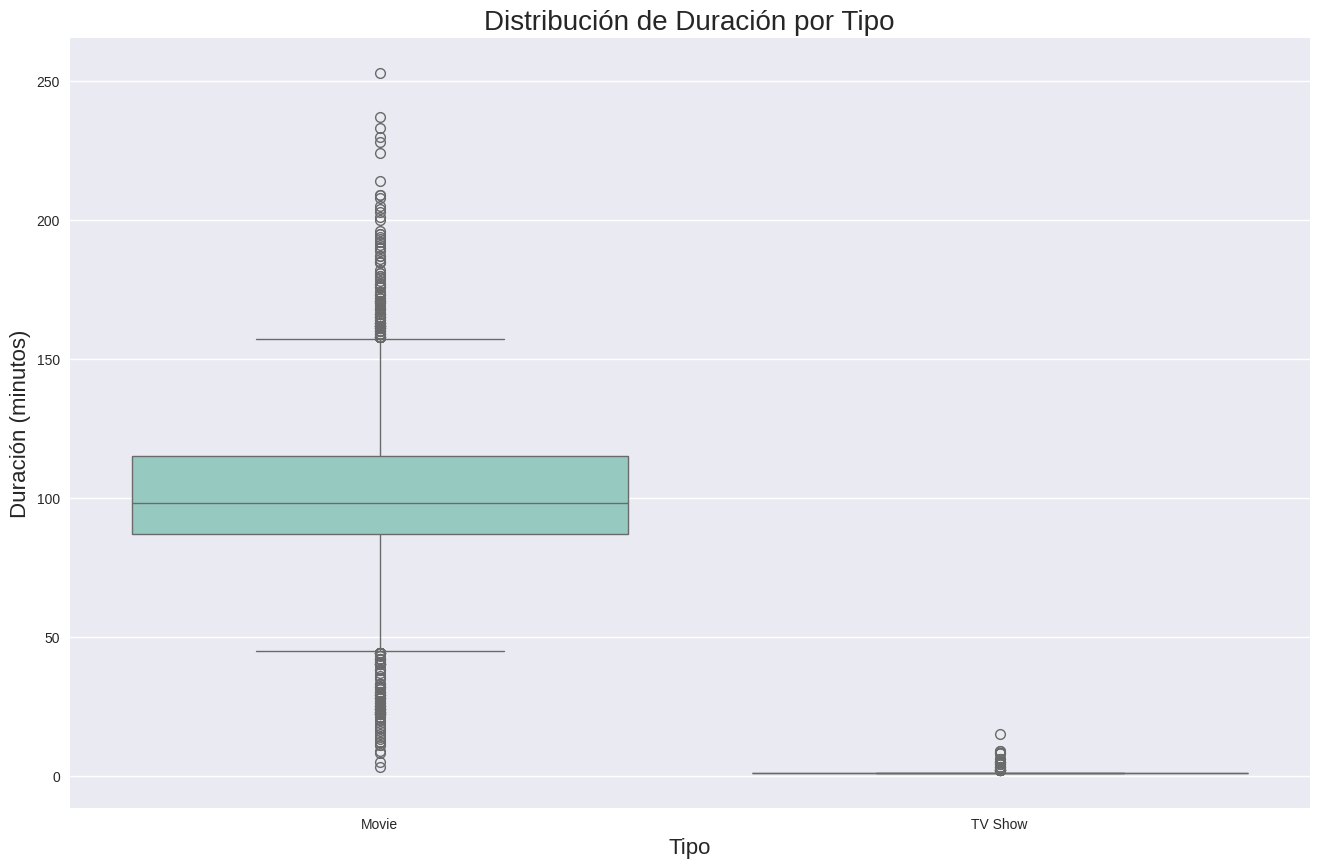

In [33]:
plt.figure(figsize=(16, 10))
sns.boxplot(data=df, x='type', y='duration', hue='type', legend=False, palette='Set3')
plt.title('Distribución de Duración por Tipo', fontsize=20)
plt.xlabel('Tipo', fontsize=16)
plt.ylabel('Duración (minutos)', fontsize=16)
plt.show()

### 3. Heatmap de correlación entre variables numéricas

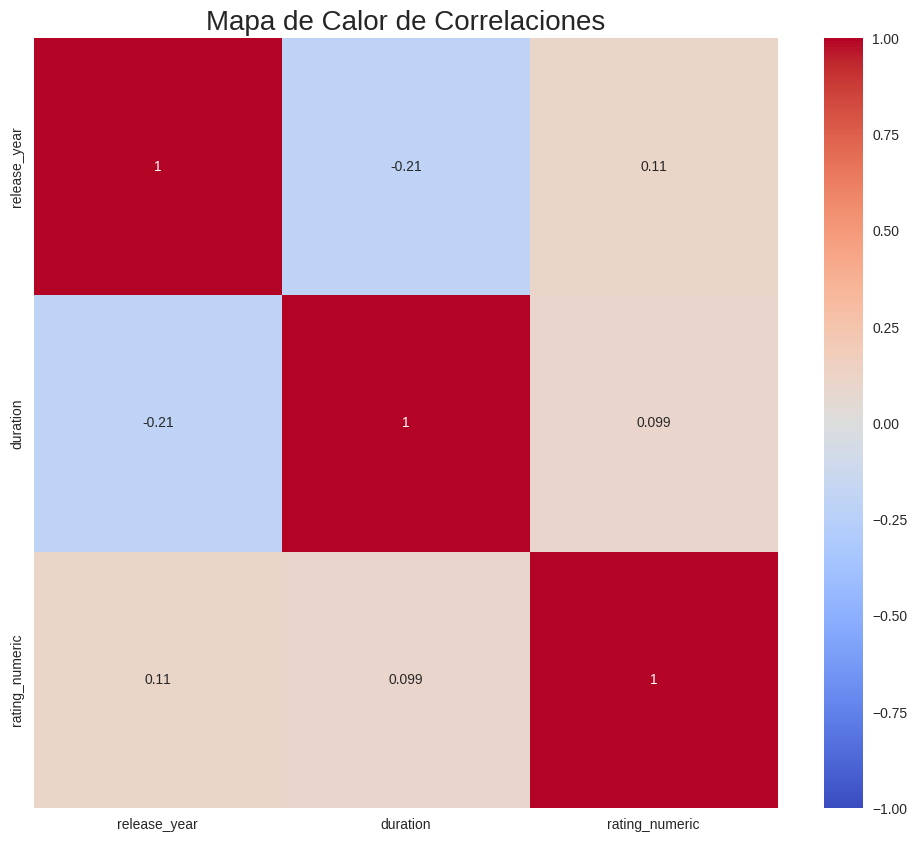

In [34]:
numeric_cols = ['release_year', 'duration', 'rating_numeric']
corr_matrix = df[numeric_cols].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Mapa de Calor de Correlaciones', fontsize=20)
plt.show()

Este mapa de calor muestra cómo se relacionan el año de lanzamiento, la duración y la calificación  de peliculas y programas, el azul claro con un valor de -0.21 indica que con el tiempo las peliculas y programas han ido siendo un poco más cortos, pero no es algo muy fuerte, el cremita con un valor de 0.11 muestra que casi no hay relación entre cuánto dura una peli o en qué año salió y la calificación que recibe, el rojo oscuro solo aparece cuando una variable se compara a sí misma, con un valor de 1, en general viendolo todo no hay relaciones demasidado fuertes o evidentes entre variables

### 4. Gráfico de líneas para mostrar tendencias de ratings a lo largo de los años

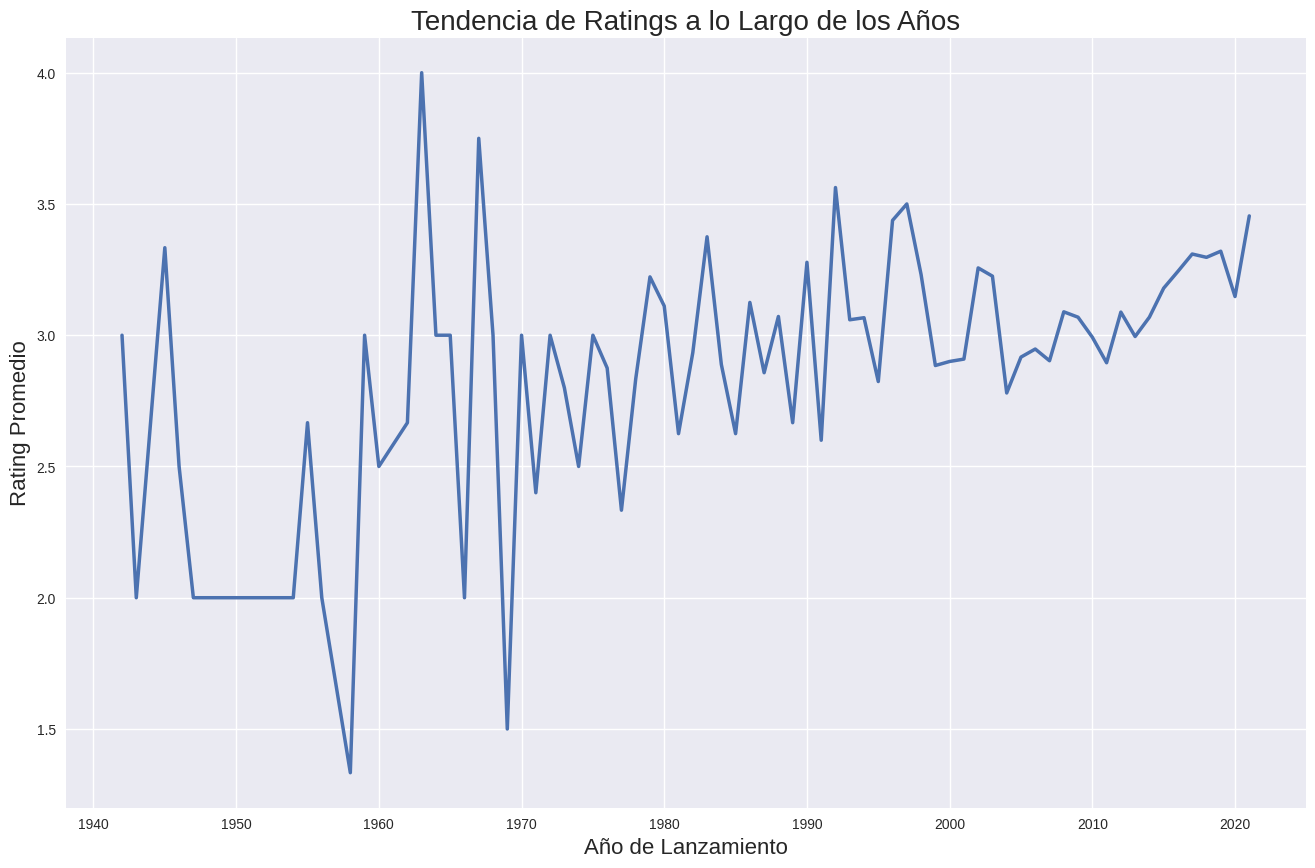

In [35]:
df_ratings = df.groupby('release_year')['rating_numeric'].mean().reset_index()

plt.figure(figsize=(16, 10))
sns.lineplot(data=df_ratings, x='release_year', y='rating_numeric', linewidth=2.5)
plt.title('Tendencia de Ratings a lo Largo de los Años', fontsize=20)
plt.xlabel('Año de Lanzamiento', fontsize=16)
plt.ylabel('Rating Promedio', fontsize=16)
plt.show()

El gráfico muestra que hay muchos altibajos, pero a partir de los años 80 se estabilizan más, ya no hay tantas subidas ni bajadas y las calificaciones empiezan a ser más estables, marcandose eso mas en los años 2000, donde se nota que las calificaciones son un poco más altas, esto parece mostrar que a la gente le empezaron a gustar mas las peliculas en ese tiempo

### 5. Gráfico de líneas para mostrar tendencias de géneros a lo largo de los años

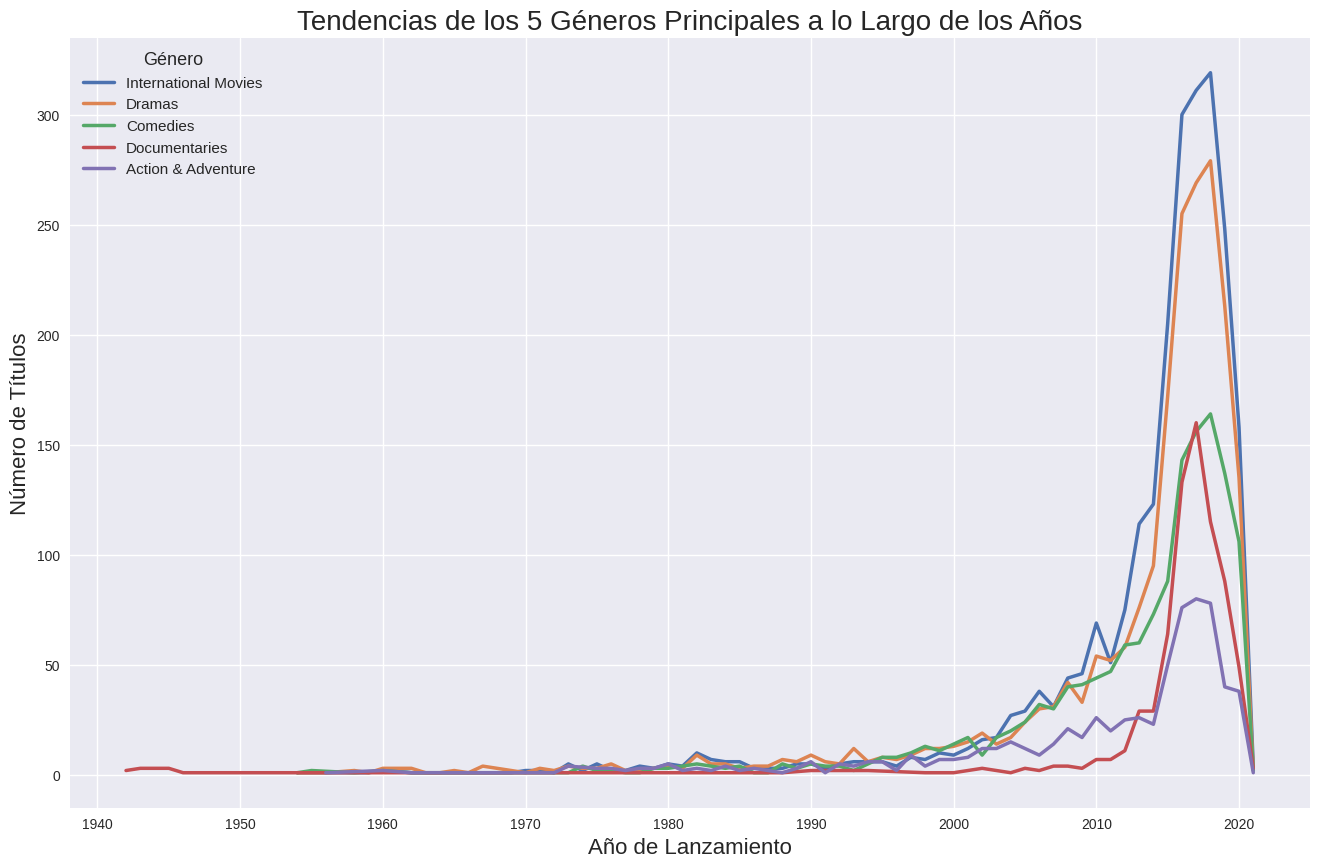

In [36]:
# Se procesa la columna de géneros
df['genres'] = df['genres'].str.split(', ')
genres_df = df.explode('genres')

top_genres = genres_df['genres'].value_counts().nlargest(5).index

plt.figure(figsize=(16, 10))
for genre in top_genres:
    genre_data = genres_df[genres_df['genres'] == genre].groupby('release_year').size()
    plt.plot(genre_data.index, genre_data.values, label=genre, linewidth=2.5)

plt.title('Tendencias de los 5 Géneros Principales a lo Largo de los Años', fontsize=20)
plt.xlabel('Año de Lanzamiento', fontsize=16)
plt.ylabel('Número de Títulos', fontsize=16)
plt.legend(title='Género', title_fontsize='13', fontsize='11')
plt.show()

El gráfico muestra que antes de 1990 casi no había títulos lanzados en los géneros principales, pero desde los 90 empiezan a crecer, especialmente Dramas e International Movies, después de 2010 todos los géneros suben rápido, siendo International Movies el más destacado con más de 300 títulos, luego, después de 2020, todos bajan, tal vez por falta de datos o una baja en producción

In [41]:
fig = px.scatter(df, x='release_year', y='duration', color='type',
                 hover_data=['title', 'rating'],
                 title='Duración de películas/series por año de lanzamiento',
                 labels={'release_year': 'Año de lanzamiento', 'duration': 'Duración (minutos)', 'type': 'Tipo'})
fig.show()

INTERPRETACION

In [39]:
top_countries = df['country'].value_counts().nlargest(10)
fig = px.bar(top_countries, x=top_countries.index, y=top_countries.values,
             title='Top 10 países con más producciones',
             labels={'country': 'País', 'y': 'Número de producciones'})
fig.show()

ITERPRETACION

In [54]:
fig = px.pie(df, names='type', title='Distribución de películas y series')
fig.show()

INTERPRETACION

In [55]:
fig = px.histogram(df, x='rating_numeric', nbins=20,
                   title='Distribución de calificaciones',
                   labels={'rating_numeric': 'Calificación'})
fig.show()


INTERPRETACION

In [59]:
yearly_counts = df['release_year'].value_counts().sort_index()
fig = px.line(x=yearly_counts.index, y=yearly_counts.values,
              title='Tendencia de producciones por año',
              labels={'x': 'Año','y': 'Produciones'})
fig.show()

In [62]:
fig = px.box(df, x='type', y='duration',
             title='Distribución de duración por tipo de contenido',
              labels={'type': 'Tipo','duration': 'Duración'})
fig.show()

ONTERPRETACION

In [63]:
numeric_df = df[['release_year', 'duration', 'rating_numeric']]
corr_matrix = numeric_df.corr()
fig = go.Figure(data=go.Heatmap(z=corr_matrix.values,
                                x=corr_matrix.columns,
                                y=corr_matrix.columns,
                                colorscale='Viridis'))
fig.update_layout(title='Mapa de calor de correlaciones')
fig.show()

INTERPRETACION